# Assignment 2 - Linear Regression

Objective:

In this assignment, you will explore the concept of linear regression, learn how to implement it using Python, and evaluate a model’s performance. By the end of this assignment, you should be able to:

* Understand the theoretical foundations of linear regression.
* Implement linear regression using Scikit-learn.
* Evaluate the model's performance using metrics such as Mean Squared Error (MSE) and R-squared (R²).


Instructions:

Complete each of the tasks below. Download and upload your Jupyter notebook containing your code **and output** along with all answers to your github classroom repository. Add, commit, and push the notebook before the due date.

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 1: Linear Regression Concepts (10 points)

**Question: Explain what linear regression is and describe a real-world example where linear regression could be applied.**

YOUR ANSWER: Linear regression is a supervised learning algorithm that models the relationship between a dependant variable (the target) and one or more independant variables (features). A real-world example where linear regression could be applied is determining what treatment would be most effective for a patient based on a multitude of factors.

## Part 2: Linear Regression with Sklearn (85 points)

For this assignment you'll be working with a Housing dataset. Your data for this assignment is in iris_data.csv. You may need to read more about the dataset in order to map the variables in the data.

### A. Load the data (10 points)
Load the [House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview) dataset from Kaggle. You may need to download the dataset and move it to your working location in order to read it in.


In [2]:
df = pd.read_csv("/content/drive/My Drive/CoLab Notebooks/ODSA_Machine_Learning/Datasets/train.csv",  na_values=['NA'])
label = 'SalePrice'
Y = df[label]
X = df.drop(label, axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Question: What is the House Prices dataset?**

YOUR ANSWER: The House Prices dataset includes data on different features of a house in order to predict the potential price of a house. These features include sales condition, sales type, year sold, and other factors.

### (optional) Train/Test Split the Data (5 bonus points)


For extra points, split into training and testing. Use the training dataset to perform EDA (exploratory data analysis) and fit the model. Predict on the test dataset and evaluate model performance.

In [3]:
from sklearn.model_selection import train_test_split

y = df.pop('SalePrice')
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### B. Visualize Target Variable (5 points)
Create a histogram of the target variable, `SalesPrice`

(array([120., 573., 301., 106.,  43.,  18.,   3.,   1.,   1.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

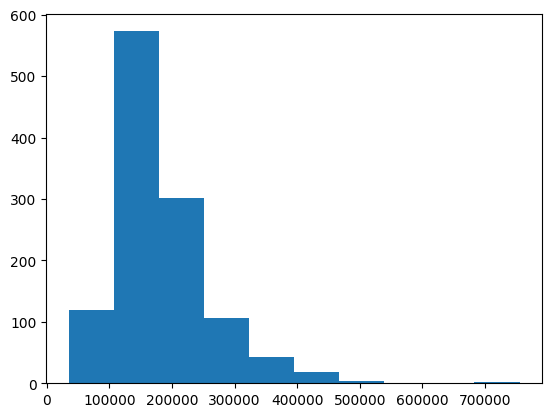

In [4]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
plt.hist(y_train)

### C. Visualize Feature (5 points)
Create a visualization of one feature:
* **GrLivArea:** Above grade (ground) living area square feet

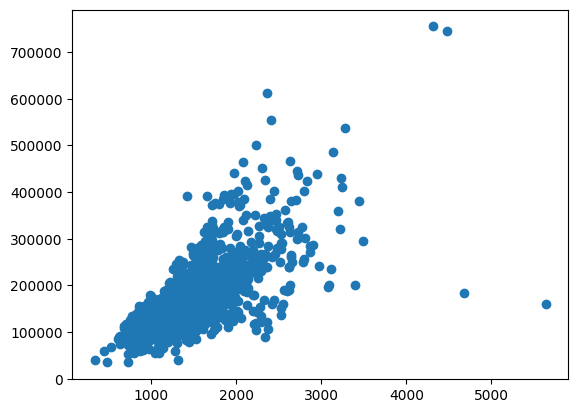

In [5]:
# YOUR CODE HERE
#df.plot.scatter(x='GrLivArea', y='SalePrice')
plt.scatter(X_train['GrLivArea'], y_train)
plt.show()

### D. Fit a Simple Linear Regression Model (5 points)
Create a linear model with just one X variable input: GrLivArea.

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# YOUR CODE HERE
fitModel = model.fit(X_train[['GrLivArea']], y_train)

### E. Score the Model (5 points)
Run predict on the fitted model. Pass the predictions to the mean squared error scoring function: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [7]:
# YOUR CODE HERE
from sklearn.metrics import mean_squared_error

housePricePred = fitModel.predict(X_test[['GrLivArea']])
mse = mean_squared_error(y_test, housePricePred)
print("Mean squared error: %.2f" % mse)

Mean squared error: 2553792703.69


### F. Plot the Fitted Line (10 points)
Plot the X feature, GrLivArea, on the X axis and the Y label, SalesPrice, on the Y axis. Add the model line to the visualization.

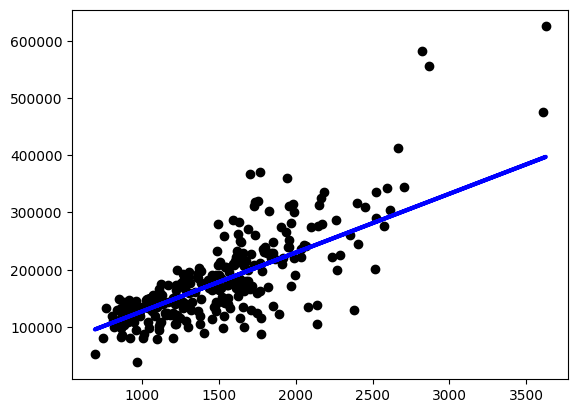

In [8]:
# YOUR CODE HERE
plt.scatter(X_test['GrLivArea'], y_test, color="black")
plt.plot(X_test['GrLivArea'], housePricePred, color="blue", linewidth=3)

plt.show()

**Question (5 points):** What is the weight and bias or your model? What is the formula?

YOUR ANSWER: The weight of my model is 102.778 and the bias of my model is 24402.886. The formula is y = 102.778x + 244022.886

In [9]:
print("Intercept:", fitModel.intercept_)
print("Coefficients:", fitModel.coef_)

Intercept: 24402.886301930033
Coefficients: [102.77760841]


### G. Add More Features (20 points)

The goal of this exercise is to compile a table of results -- MSE computed for 5 models:
1. features = GrLivArea
2. features = GrLivArea, Feature2
3. features = GrLivArea, Feature2, Feature3
4. features = GrLivArea, Feature2, Feature3, Feature4

Select 4 additional features of your personal choice.

In [10]:
X_train[['GrLivArea', 'SaleCondition']]

,GrLivArea,SaleCondition
318,2646,Normal
580,1429,Normal
961,2872,Normal
78,1768,Normal
5,1362,Normal
...,...,...
1041,1632,Normal
1122,960,Abnorml
1346,2156,Normal
1406,768,Normal


In [11]:
# Add Feature 2: Lot Area
fitModel = model.fit(X_train[['GrLivArea', 'LotArea']], y_train)
housePricePred = fitModel.predict(X_test[['GrLivArea', 'LotArea']])
mse = mean_squared_error(y_test, housePricePred)
print("Mean squared error: %.2f" % mse)

Mean squared error: 2519741949.85


In [12]:
# Add Feature 3: Year Sold
fitModel = model.fit(X_train[['GrLivArea', 'LotArea', 'YrSold']], y_train)
housePricePred = fitModel.predict(X_test[['GrLivArea', 'LotArea', 'YrSold']])
mse = mean_squared_error(y_test, housePricePred)
print("Mean squared error: %.2f" % mse)

Mean squared error: 2521348472.14


In [13]:
# Add Feature 4: MS Sub Class
fitModel = model.fit(X_train[['GrLivArea', 'LotArea', 'YrSold', 'MSSubClass']], y_train)
housePricePred = fitModel.predict(X_test[['GrLivArea', 'LotArea', 'YrSold', 'MSSubClass']])
mse = mean_squared_error(y_test, housePricePred)
print("Mean squared error: %.2f" % mse)

Mean squared error: 2533529807.67


In [14]:
# Add Feature 5: Month Sold
fitModel = model.fit(X_train[['GrLivArea', 'LotArea', 'YrSold', 'MSSubClass', 'MoSold']], y_train)
housePricePred = fitModel.predict(X_test[['GrLivArea', 'LotArea', 'YrSold', 'MSSubClass', 'MoSold']])
mse = mean_squared_error(y_test, housePricePred)
print("Mean squared error: %.2f" % mse)

Mean squared error: 2533257237.69


**Question:** Enter your model results in the grid below

*Written answer:*

Model          | MSE
---            | ---
GrLivArea      | 2553792703.69
GrLivArea, LotArea | 2519741949.85
GrLivArea, LotArea, YrSold  | 2521348472.14
GrLivArea, LotARea, YrSold, MSSubClass   | 2533529807.67
GrLivArea, LotARea, YrSold, MSSubClass, MoSold | 2533257237.69